<a href="https://colab.research.google.com/github/Warda1121/CSE-375-3--2021-2-60-164/blob/main/Lab1_Task_2021_2_60_164_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Task - Decision Tree and Random Forest

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Dataset Overview

In [34]:
data_path = "/content/drive/MyDrive/CSE475 dataset/MangoLeafBD Dataset/MangoLeafBD Dataset"
categories = os.listdir(data_path)
print("Categories:", categories)


Categories: ['Healthy', 'Sooty Mould', 'Cutting Weevil', 'Anthracnose', 'Die Back', 'Powdery Mildew', 'Gall Midge', 'Bacterial Canker']


Display Sample Images from Each Class

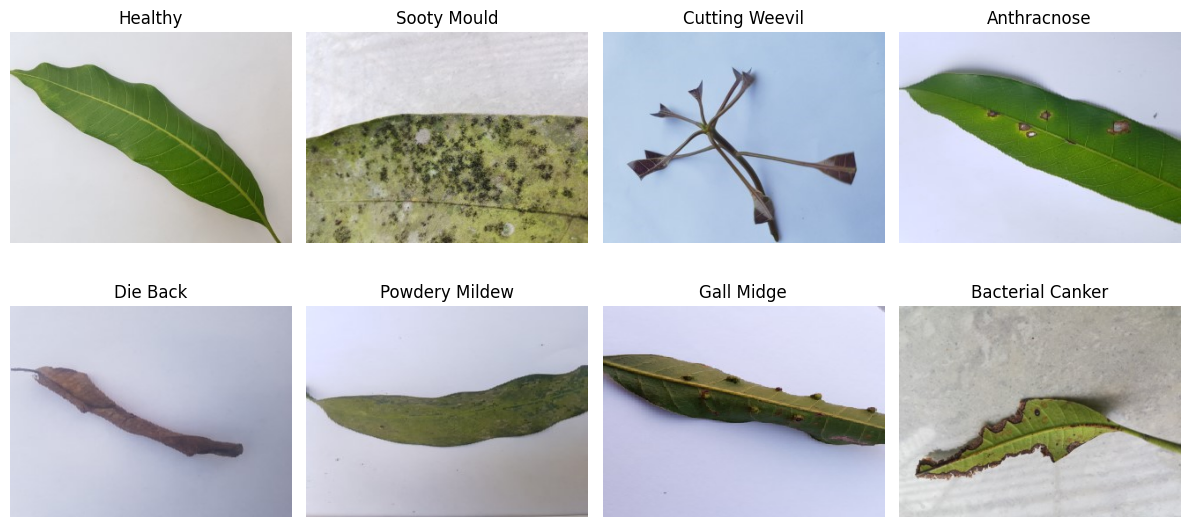

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, category in enumerate(categories):
    img_path = os.path.join(data_path, category, os.listdir(os.path.join(data_path, category))[0])
    img = load_img(img_path, target_size=(240, 320))
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title(category)
    axes[i//4, i%4].axis("off")
plt.tight_layout()
plt.show()


Feature Distribution via PCA




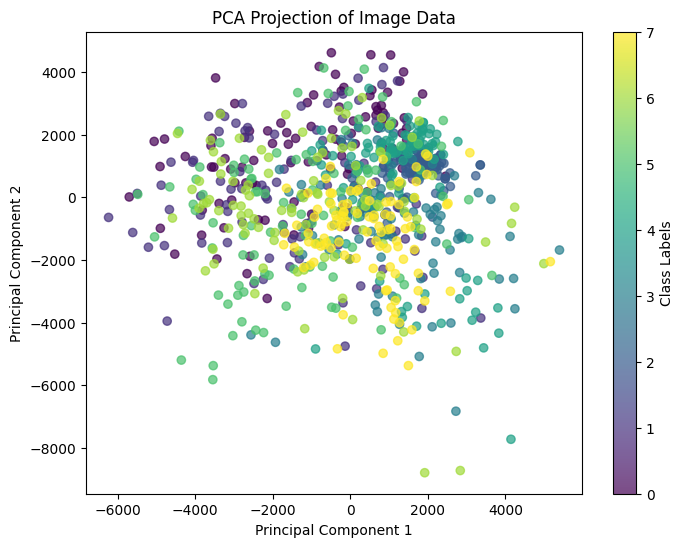

In [36]:
from sklearn.decomposition import PCA
X, y = [], []
img_size = (64, 64)  # Reduce size for PCA
for category in categories:
    label = categories.index(category)
    for img_file in os.listdir(os.path.join(data_path, category))[:100]:  # Sample 100 images per class
        img_path = os.path.join(data_path, category, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size).flatten()  # Flatten for PCA
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Image Data")
plt.show()


Load and Preprocess Images

In [37]:
X, y = [], []
img_size = (128, 128)  # Resize for faster processing

for category in categories:
    label = categories.index(category)
    for img_file in os.listdir(os.path.join(data_path, category)):
        img_path = os.path.join(data_path, category, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = img_to_array(img) / 255.0  # Normalize
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)


Split Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42, stratify=y)

**Train Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7025
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       100
           1       0.54      0.50      0.52       100
           2       0.92      0.96      0.94       100
           3       0.72      0.70      0.71       100
           4       0.87      0.87      0.87       100
           5       0.66      0.64      0.65       100
           6       0.52      0.55      0.54       100
           7       0.76      0.78      0.77       100

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



**Train Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.87875
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.83      0.85      0.84       100
           2       0.99      0.98      0.98       100
           3       0.89      0.94      0.91       100
           4       0.99      0.94      0.96       100
           5       0.92      0.79      0.85       100
           6       0.74      0.75      0.74       100
           7       0.82      0.90      0.86       100

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



Performance Comparison

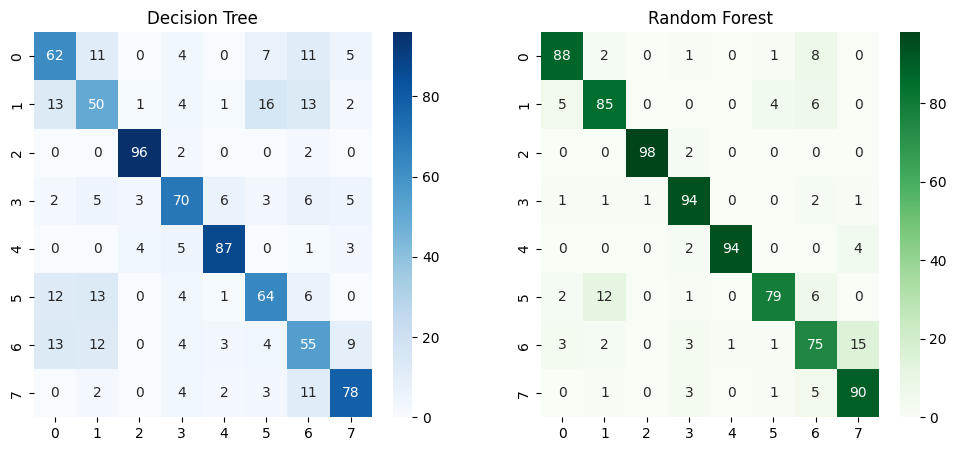

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("Decision Tree")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title("Random Forest")

plt.show()
